# SPINSpy Tutorial (2D): 

>This document will (hopefully) show you everything that you need to know to be able to process your SPINS outputs using python (why python? Because it's not MATLAB). This tutorial will assume that you have a basic understanding of python syntax.
>
>To begin, we import some useful packages. Base python is fairly bare-bones, but you'll find that there's a package for almost anything that you want.

In [2]:
%matplotlib inline 
# Tells the system to plot in-line, only necessary for iPython notebooks,
# not regular command-line python
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import time

In [3]:
# Now that we have our packages, we need data. The file 'make_2d_data.py' will
# generate a sample data set. Let's run that now.

#execfile('make_2d_data.py')



>If we want to use our shiny python scripts, we'll need to import them too.

In [4]:
import spinspy as spy
import matpy as mp

> If we want a quick man-page style summary, we can call `help(spy)`. We can also help `help(spy.<func>)` for more information on the function `<func>`. Since the data that we're looking at is in a different directory, let's specify that now.
>> Note: This means that you don't need to be in the same directory as your data.

In [8]:
help(spy)
spy.set_prefix('Data/2d')

Help on package spinspy:

NAME
    spinspy

FILE
    /u/bastorer/Documents/PyLab/SPINSpy/spinspy/__init__.py

DESCRIPTION
    # SPINSPY
    #   This module contains functions that are
    #   designed to handle SPINS-type outputs.
    #   The provided functions are listed below,
    #   along with basic usage information.

PACKAGE CONTENTS
    get_diagnostics
    get_shape
    grid
    isdim
    make_movie
    reader
    set_prefix
    spinspy_classes

FUNCTIONS
    get_diagnostics(fp='diagnostics.txt')
        ## ------------------
        ## Purpose: Parse diagnostics.txt and return a
        ##          class that contains each diagnostic
        ##          variable.
        ## Inputs:
        ##    fp (optional): Specifies the filename of
        ##                   of the diagnostics file.
        ## Usage: 
        ##    diag = spinspy.get_diagnostics()
    
    get_shape()
        ## Determine simulation parameters
        ## Purpose:
        ##     If spins.conf exists
      

## Reading Full Files

>Now that we have all of our tools, let's start doing! Let's see what we have first.

In [9]:
ls Data/2d

h.0         h.20        u.0         u.20        v.1         v.21
h.1         h.21        u.1         u.21        v.10        v.22
h.10        h.22        u.10        u.22        v.11        v.23
h.11        h.23        u.11        u.23        v.12        v.24
h.12        h.24        u.12        u.24        v.13        v.3
h.13        h.3         u.13        u.3         v.14        v.4
h.14        h.4         u.14        u.4         v.15        v.5
h.15        h.5         u.15        u.5         v.16        v.6
h.16        h.6         u.16        u.6         v.17        v.7
h.17        h.7         u.17        u.7         v.18        v.8
h.18        h.8         u.18        u.8         v.19        v.9
h.19        h.9         u.19        u.9         v.2         xgrid
h.2         spins.conf  u.2         v.0         v.20        ygrid


> We have h, u, and v. Let's read and plot our initial height field.

In [11]:
h = spy.reader('h', 0, [0,-1], [0,-1])

>What the heck did that just do? Let's break it down and look at the inputs.
>
>* `'h'` : This tells the function which variable to load (in this case, h)
>* `0` : This is the index, so we will load h.0.
>* `[0,-1]` : The x-range to load. This is shorthand and is equivalent to ':' from MATLAB. 
>* `[0,-1]` : The y-range
>
>Here we have loaded the entire thing. Alternatively, you could have given a single value or a list of indices. That is, giving `0` would take the first slice, `[0,100]` takes the first 100 elements, and `[0,2,4,6]` takes the first, third, fifth, and, seventh elements.

In [12]:
h.shape

(128, 128)

>Note that this is ordered as (Nx,Ny). If we had wanted MATLAB style ordering (Ny,Nx), we could have used the optional argument `ordering = 'matlab'` (useful for some plotting). The default is `ordering = 'natural'` (useful because it feels right).

## Loading Grids and Simulation Information

>To begin, let's load in our grid. Since we aren't dealing with mapped grids, we only need vectors (the default behaviour).

In [16]:
#x,y = spy.grid()
x = spy.reader('x',[0,-1],0)
y = spy.reader('y',0,[0,-1])
print('The shape of x is {0} and the shape of y is {1}'.format(x.shape,y.shape))

The shape of x is (128,) and the shape of y is (128,)


>Perfect, now we have our grid vectors. We can also load in grid information, such as the domain size and limits. This is stored in a class that has a method called `display'. These are illustrated below.

In [17]:
data = spy.get_shape()
print(data.Nx,data.Ny,data.Nz)
print('---')
data.display()

(128, 128, 1)
---
2-dimensional simulation:
  x-Dimension:
    Number of Points: 128
    Length of Domain: 1.400e+05
    Bounds of Domain: n/a
    Type: REAL
  y-Dimension:
    Number of Points: 128
    Length of Domain: 1.400e+05
    Bounds of Domain: n/a
    Type: REAL
Other parameters:
  H: 500.0
  Ljet: 10000.0
  NL: 1.0
  Ujet: 1.0
  beta: 0.0
  dt: 4.0
  f0: 0.0001
  g: 0.0981
  kap: 0.0
  nct: 24.0
  npt: 450.0
  nu: 0.0
  sponge_sharp_east: 1000.0
  sponge_sharp_north: 1000.0
  sponge_sharp_south: 1000.0
  sponge_sharp_west: 1000.0
  sponge_stren_east: 0.0
  sponge_stren_north: 0.0
  sponge_stren_south: 0.0
  sponge_stren_west: 0.0
  sponge_width_east: 10000.0
  sponge_width_north: 10000.0
  sponge_width_south: 10000.0
  sponge_width_west: 10000.0
  t0: 0.0
  tau0: 0.0
  tf: 43200.0
Settings:
  h_file: data_IC_h
  u_file: data_IC_u
  v_file: data_IC_v
  xgrid: xgrid
  ygrid: ygrid


## Plotting

>We now have our grid vectors and height field loaded into memory, so it's time to try some plotting! A standard plotting library in python is matplotlib, which replicates many of MATLAB's 2D plotting functions. For example, here we have a pcolor and contour plot.

Time to plot: 1.05e-01


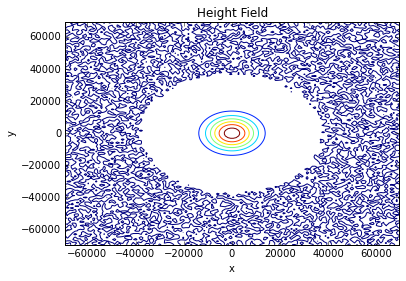

In [19]:
plt.figure(1)
t0 = time.clock()
plt.contour(x,y,h.transpose()) # Transpose for plotting order
t1 = time.clock()
print('Time to plot: {0:1.2e}'.format(t1-t0))
plt.title('Height Field');
plt.xlabel('x');
plt.ylabel('y');

Time to plot: 7.47e-01


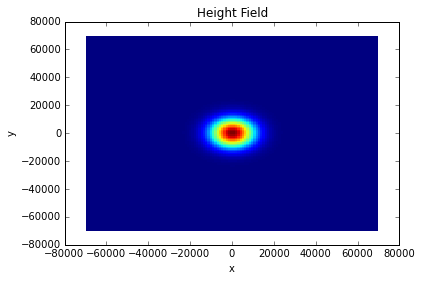

In [20]:
plt.figure(2)
t0 = time.clock()
plt.pcolor(x,y,h.transpose());
t1 = time.clock()
print('Time to plot: {0:1.2e}'.format(t1-t0))
plt.title('Height Field');
plt.xlabel('x');
plt.ylabel('y');

Time to plot: 6.73e-02


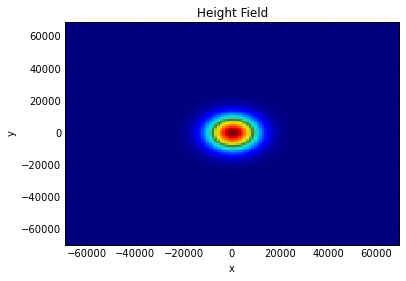

In [21]:
plt.figure(3)
t0 = time.clock()
plt.pcolormesh(x,y,h.transpose(), cmap='darkjet')
t1 = time.clock()
print('Time to plot: {0:1.2e}'.format(t1-t0))
plt.title('Height Field')
plt.xlabel('x')
plt.ylabel('y')
plt.axis('tight')
plt.show()

>We've just seen three examples of 2D plots: `contour`, `pcolor`, and `pcolormesh` (`contourf` also exists). In general, if you'll be working with high resolution rectangular grids, choose `pcolormesh` over `pcolor` as it is cheaper on memory and time. The time taken for each plot was printed when you made the plots and pcolormesh was significantly faster! (Note: pcolormesh will not work for mapped grids)
>
>Also, both `pcolor` and `pcolormesh` have the unfortunate habit of adding extra white space, so you will often need to specify the axis limits or call plt.axis('tight')
>
>Most MATLAB colour maps are also available in matplotlib, you just need to set the optional argument `cmap='colourmap_name'`. The package matpy provides darkjet.